In [95]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [96]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [97]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [98]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

40.7212071356974 -163.82506123805905
9.267159219081023 -114.47440722504834
-86.15270562612933 -37.112367588130695
29.36006026728522 -131.63759622829446
-1.7698753339702478 90.97766844749663
59.545074628171136 137.65159202784633
61.21449948703827 40.02962646532478
78.27995409422164 -19.235371110239697
32.713893901089435 72.47436994690551
-20.506096591285456 70.4207229394263
-25.656054234162212 -29.551833547782707
61.67086052621613 -111.69092301781323
68.24836993174523 71.14809935449682
38.8148189649136 -55.85134171513745
-12.412228928337228 18.26089484834887
33.2968169925946 -64.34383645544952
-58.03696125410276 -138.73873392897798
-78.67773363909953 76.27983603998308
69.05099335877159 -107.12980726862506
-66.90150383298096 109.98863888339145
27.80641145995797 143.86451254202348
-9.841904200921661 72.6695127289999
-53.13909038032956 101.18480985240768
-30.418524165302436 152.739534884004
-43.769649163412296 -53.292198039582416
30.961716053105746 17.970304310624385
-70.25579123182803 -91

-40.18687241389522 95.83364456714293
79.87558441285375 -112.68548283406135
14.169962658456413 25.268313864988897
-29.2630486071534 147.72788957936336
86.01931652866543 90.3585502467987
-28.892030185255045 174.79017322113788
40.969860978533546 108.0033986651664
37.576150529982 51.41933969790361
-18.134035231324916 -135.2540230890205
76.44409483640527 72.61712706426769
68.01534756585616 -58.381488684291924
41.63849401308025 -174.63373904055837
33.94222111803211 -132.7532442831836
2.4540920798243917 -133.6842034746945
29.98186886746157 83.61479341067934
35.88797458186305 175.1911108805399
-55.71217505826588 -115.50769305645633
-0.631141165765996 -79.09944705868983
-9.47466514531115 8.88878986630084
-24.124895116526545 97.46594286441865
32.513473549183956 172.96078914368314
-24.61093547414157 156.53687714535766
-32.50226535778794 -4.957652654626884
52.945761160522295 5.803383378812612
-26.318183120928097 120.75312901265664
27.75444584666306 -159.8164338649716
20.771232012161832 -96.7448272

In [99]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [100]:
import requests
requests.__version__

'2.27.1'

In [101]:
# Import the requests library.
import requests

# Import the API key
from config2 import weather_api_key

In [102]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [103]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [104]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retreival      ")
print("                              ")

# Create Counters.
record_count = 1
set_count = 1

Beginning Data Retreival      
                              


In [105]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for loggin purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endponit URL with each city.
    city_url = url + '&q=' + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | san patricio
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | pacific grove
Processing Record 5 of Set 1 | meulaboh
Processing Record 6 of Set 1 | solnechnyy
Processing Record 7 of Set 1 | voloshka
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | talagang
Processing Record 10 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 11 of Set 1 | vila velha
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | yar-sale
Processing Record 14 of Set 1 | saint-pierre
Processing Record 15 of Set 1 | camacupa
Processing Record 16 of Set 1 | saint george
Processing Record 17 of Set 1 | rikitea
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | albany
Processing Record 20 of Set 1 | katsuura
Processing Record 21 of Set 1 | hithadhoo
Processing Record 22 of Set 1 | nambucca heads
Proc

Processing Record 41 of Set 4 | coihaique
Processing Record 42 of Set 4 | monterey
Processing Record 43 of Set 4 | clyde river
Processing Record 44 of Set 4 | kandi
Processing Record 45 of Set 4 | vardo
Processing Record 46 of Set 4 | cidreira
Processing Record 47 of Set 4 | port alfred
Processing Record 48 of Set 4 | saryozek
Processing Record 49 of Set 4 | yulara
Processing Record 50 of Set 4 | arandis
Processing Record 1 of Set 5 | umzimvubu
City not found. Skipping...
Processing Record 2 of Set 5 | castro
Processing Record 3 of Set 5 | arraial do cabo
Processing Record 4 of Set 5 | namibe
Processing Record 5 of Set 5 | nanzhang
Processing Record 6 of Set 5 | pailon
Processing Record 7 of Set 5 | loubomo
Processing Record 8 of Set 5 | alberton
Processing Record 9 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 5 | sao filipe
Processing Record 11 of Set 5 | marcona
City not found. Skipping...
Processing Record 12 of Set 5 | fairbanks
Processing Record

Processing Record 31 of Set 8 | kirakira
Processing Record 32 of Set 8 | marystown
Processing Record 33 of Set 8 | xining
Processing Record 34 of Set 8 | qandala
Processing Record 35 of Set 8 | may pen
Processing Record 36 of Set 8 | atasu
Processing Record 37 of Set 8 | rodeo
Processing Record 38 of Set 8 | plastun
Processing Record 39 of Set 8 | nurota
Processing Record 40 of Set 8 | komsomolskiy
Processing Record 41 of Set 8 | brenham
Processing Record 42 of Set 8 | bukene
Processing Record 43 of Set 8 | calabozo
Processing Record 44 of Set 8 | lebu
Processing Record 45 of Set 8 | brigantine
Processing Record 46 of Set 8 | mokhsogollokh
Processing Record 47 of Set 8 | musiri
Processing Record 48 of Set 8 | manokwari
Processing Record 49 of Set 8 | reigate
Processing Record 50 of Set 8 | kyaukse
Processing Record 1 of Set 9 | masunga
Processing Record 2 of Set 9 | nalhati
Processing Record 3 of Set 9 | kashi
Processing Record 4 of Set 9 | nanortalik
Processing Record 5 of Set 9 | tur

Processing Record 22 of Set 12 | vanimo
Processing Record 23 of Set 12 | fare
Processing Record 24 of Set 12 | gizo
Processing Record 25 of Set 12 | cartagena del chaira
Processing Record 26 of Set 12 | ust-koksa
Processing Record 27 of Set 12 | alihe
Processing Record 28 of Set 12 | ozieri
Processing Record 29 of Set 12 | ponta delgada
Processing Record 30 of Set 12 | ferrol
Processing Record 31 of Set 12 | cao bang
Processing Record 32 of Set 12 | leeton
Processing Record 33 of Set 12 | alekseyevsk
Processing Record 34 of Set 12 | ternate
Processing Record 35 of Set 12 | muisne
Processing Record 36 of Set 12 | san lorenzo
Processing Record 37 of Set 12 | hollister
Processing Record 38 of Set 12 | saint-raymond
Processing Record 39 of Set 12 | ngukurr
City not found. Skipping...
Processing Record 40 of Set 12 | miles city
Processing Record 41 of Set 12 | nizhniye vyazovyye
Processing Record 42 of Set 12 | am timan
Processing Record 43 of Set 12 | porto novo
Processing Record 44 of Set

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2022-03-11 18:15:57,-34.4187,19.2345,78.80,77,100,4.34
1,Krasnoselkup,RU,2022-03-11 18:15:58,65.7000,82.4667,-17.99,100,93,5.32
2,Kapaa,US,2022-03-11 18:15:58,22.0752,-159.3190,75.52,82,40,6.91
3,Pangoa,PE,2022-03-11 18:15:59,-12.1167,-73.0000,75.85,94,91,2.55
4,Bredasdorp,ZA,2022-03-11 18:15:59,-34.5322,20.0403,70.92,88,100,9.22
5,Jamestown,US,2022-03-11 18:12:18,42.0970,-79.2353,48.02,41,100,12.66
6,Vaini,TO,2022-03-11 18:13:44,-21.2000,-175.2000,73.56,100,75,4.61
7,Castro,BR,2022-03-11 18:16:00,-24.7911,-50.0119,71.65,90,52,8.75
8,Lebu,CL,2022-03-11 18:15:12,-37.6167,-73.6500,64.47,69,0,18.28
9,Husavik,IS,2022-03-11 18:16:02,66.0449,-17.3389,39.56,78,84,14.70


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]
print(lats)

0     -34.4187
1      65.7000
2      22.0752
3     -12.1167
4     -34.5322
        ...   
587    26.7292
588    29.1268
589    26.3260
590    48.5833
591    40.1629
Name: Lat, Length: 592, dtype: float64


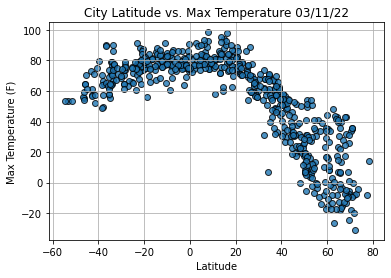

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

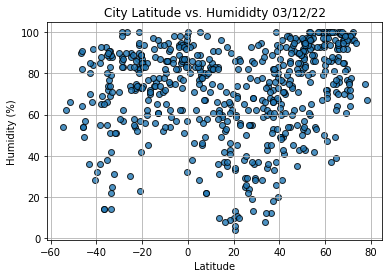

In [70]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humididty "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

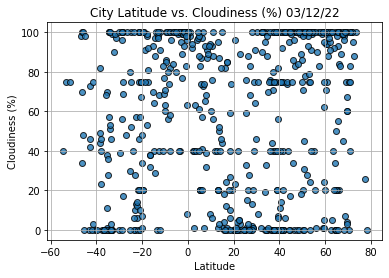

In [71]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

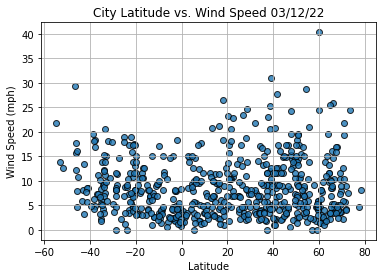

In [72]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [73]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [74]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

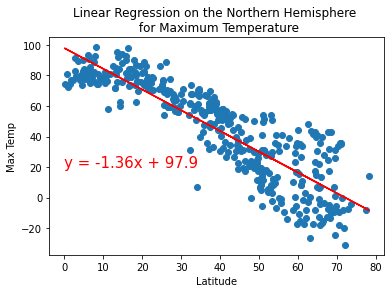

In [75]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(0,20))

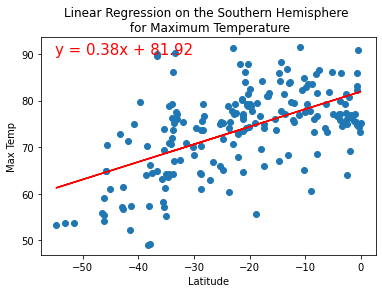

In [76]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,90))

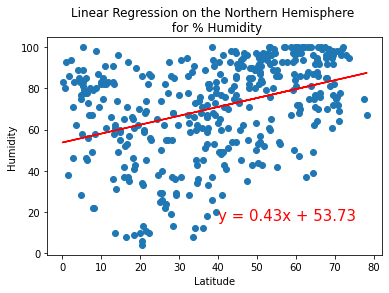

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 'Humidity',(40,16))

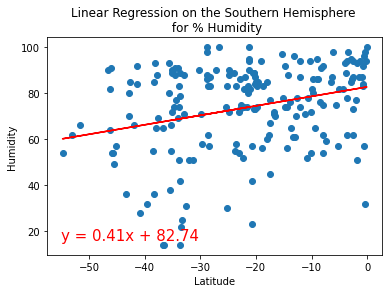

In [78]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 'Humidity',(-55,16))


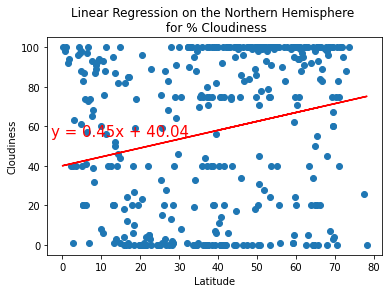

In [79]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 'Cloudiness',(-3,55))


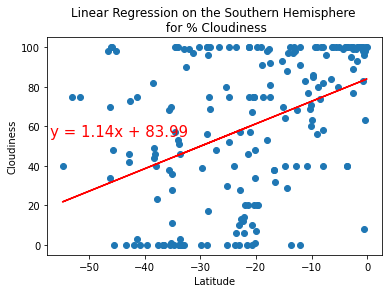

In [80]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 'Cloudiness',(-57,55))


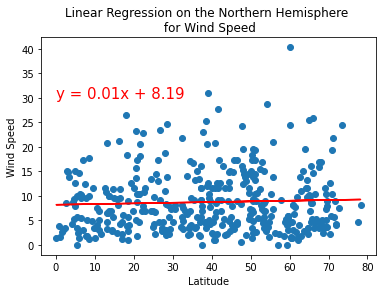

In [93]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(0,30))

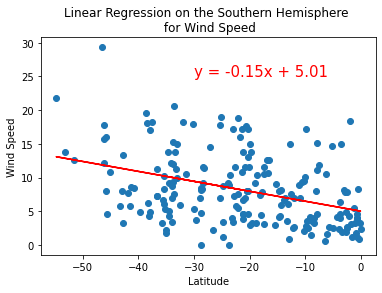

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-30,25))